# Explore Cosmos 2020 catalog

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022-04-20


See https://cosmos.astro.caltech.edu/

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d
from scipy.special import erfc
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))

In [3]:
import sys
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/sps/lsst/groups/auxtel/softs/utils/anaconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]


In [4]:
from astropy.io import fits
import pandas

In [5]:
bad_path = ['/opt/conda/lib/python3.8/site-packages']

In [6]:
sys.path.remove(bad_path[0])

In [7]:
from astropy.io import fits
from astropy.table import Table

In [8]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.left': True,
          'figure.figsize': [18, 10],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

# Input

In [9]:
path_cosmos = "../data/cosmos2020/COSMOS2020_R1"
path_cosmos_pz = "../data/cosmos2020/COSMOS2020_R1/PZ"

In [10]:
! cat ../data/cosmos2020/COSMOS2020_R1/README

FILES
------
COSMOS2020_submitted.pdf -- latest version of the paper (includes some bolded changes!)

COSMOS2020_CLASSIC_R1_v2.0.fits -- release version for Classic
COSMOS2020_CLASSIC_R1_v2.0.header -- corresponding header for release version

COSMOS2020_FARMER_R1_v2.0.fits -- release version for Farmer
COSMOS2020_FARMER_R1_v2.0.header -- corresponding header for release version

COSMOS2020_prepare_apertures.txt -- Galactic extinction + aper->total corrections (python)

MASKS/
 - MASK_*.reg -- DS9 region files for HSC, SUPCAM, UVISTA, UDEEP
 - flags_in_catalog.png -- easy to read summary of regions
 - MASKS_README.txt -- readme file for regions

PZ/
 - COSMOS2020_CLASSIC_R1_v2.0_EAZY_CZ.fits -- EAZY CDF(z) for Classic
 - COSMOS2020_CLASSIC_R1_v2.0_LEPHARE_PZ.fits -- Le Phare P(z) for Classic

 - COSMOS2020_FARMER_R1_v2.0_EAZY_CZ.fits -- EAZY CDF(z) for Farmer
 - COSMOS2020_FARMER_R1_v2.0_LEPHARE_PZ.fits -- Le Phare P(z) for Farmer

 - eazy_zcdf_pdf.txt -- script for converting EAZY CDF

In [11]:
! cat ../data/cosmos2020/COSMOS2020_R1/PZ/PZ_README

For each source, for both catalogues we provide the probability redshift distributions or p(z). These are stored as fits files. 

The p(z) results from lephare are recorded as the likelihood at a given z spanning a baseline from z=0 to 12 sampling in 500 points of equal-z.  

Slightly differently, the p(z) results from eazy are stored instead as 50 samplings of the cumulative redshift probability distribution or cdf(z), equally spaced according to multiples of the standard deviation of a Gaussian distribution. As such, the p(z) can be easily reconstructed from the relatively more compact cdf(z) data without a significant loss of precision. Alternatively, users may find it advantageous to simply assess the probability of a source being in a certain redshift range by taking the difference in the cdf(z) at two z points, equivalent to integrating the p(z) but with much less computational effort. A script is provided to help users access and use this format.

Details of the array formatting

In [12]:
inputfile_pz = os.path.join(path_cosmos,"COSMOS2020_CLASSIC_R1_v2.0.fits") 

In [13]:
#t = Table.read(inputfile_pz , hdu=1)  
#t.columns

In [14]:
with fits.open(inputfile_pz) as data:
    df = pandas.DataFrame(data[1].data)

In [15]:
df.head()

,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,1,151.008534,1.398278,1304.953247,2579.132324,0.000009,0.000010,-8.461303e-07,NaN,NaN,...,3.073000e-14,3.306278e-14,3.696300e-14,3.828873e-14,3.828873e-14,0.704550,0.809278,0.896577,0.961172,1.070924
1,2,151.028825,1.404349,818.016785,2725.062988,0.000017,0.000017,-8.587199e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,151.007706,1.398440,1324.814453,2583.007812,0.006722,0.008490,-7.216642e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,150.162372,1.391619,21610.509766,2415.219971,0.031749,0.016943,6.141999e-06,NaN,NaN,...,1.191863e-10,1.356004e-10,1.582931e-10,1.872021e-10,2.076506e-10,1.659753,1.739529,1.869392,1.989442,2.089466
4,5,149.540181,1.391537,36540.632812,2414.936523,0.030666,0.016909,3.998309e-03,NaN,NaN,...,5.692379e-12,1.106644e-11,8.179705e-11,1.089352e-08,1.089352e-08,0.032678,0.032678,2.129271,3.005573,3.125110


In [16]:
df.dropna(axis=1, how='all',inplace=True)

In [20]:
df.head()

,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,1,151.008534,1.398278,1304.953247,2579.132324,0.000009,0.000010,-8.461303e-07,NaN,NaN,...,3.073000e-14,3.306278e-14,3.696300e-14,3.828873e-14,3.828873e-14,0.704550,0.809278,0.896577,0.961172,1.070924
1,2,151.028825,1.404349,818.016785,2725.062988,0.000017,0.000017,-8.587199e-07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,151.007706,1.398440,1324.814453,2583.007812,0.006722,0.008490,-7.216642e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,150.162372,1.391619,21610.509766,2415.219971,0.031749,0.016943,6.141999e-06,NaN,NaN,...,1.191863e-10,1.356004e-10,1.582931e-10,1.872021e-10,2.076506e-10,1.659753,1.739529,1.869392,1.989442,2.089466
4,5,149.540181,1.391537,36540.632812,2414.936523,0.030666,0.016909,3.998309e-03,NaN,NaN,...,5.692379e-12,1.106644e-11,8.179705e-11,1.089352e-08,1.089352e-08,0.032678,0.032678,2.129271,3.005573,3.125110


In [18]:
len(df)

1720700

In [21]:
#for col in df.columns:
#    print(col)

ID
ALPHA_J2000
DELTA_J2000
X_IMAGE
Y_IMAGE
ERRX2_IMAGE
ERRY2_IMAGE
ERRXY_IMAGE
FLUX_RADIUS
KRON_RADIUS
FLAG_HSC
FLAG_SUPCAM
FLAG_UVISTA
FLAG_UDEEP
FLAG_COMBINED
EBV_MW
CFHT_u_FLUX_APER2
CFHT_u_FLUXERR_APER2
CFHT_u_FLUX_APER3
CFHT_u_FLUXERR_APER3
CFHT_u_FLUX_AUTO
CFHT_u_FLUXERR_AUTO
CFHT_u_MAG_APER2
CFHT_u_MAGERR_APER2
CFHT_u_MAG_APER3
CFHT_u_MAGERR_APER3
CFHT_u_MAG_AUTO
CFHT_u_MAGERR_AUTO
CFHT_u_MAG_ISO
CFHT_u_MAGERR_ISO
CFHT_u_FLAGS
CFHT_u_IMAFLAGS_ISO
CFHT_ustar_FLUX_APER2
CFHT_ustar_FLUXERR_APER2
CFHT_ustar_FLUX_APER3
CFHT_ustar_FLUXERR_APER3
CFHT_ustar_FLUX_AUTO
CFHT_ustar_FLUXERR_AUTO
CFHT_ustar_MAG_APER2
CFHT_ustar_MAGERR_APER2
CFHT_ustar_MAG_APER3
CFHT_ustar_MAGERR_APER3
CFHT_ustar_MAG_AUTO
CFHT_ustar_MAGERR_AUTO
CFHT_ustar_MAG_ISO
CFHT_ustar_MAGERR_ISO
CFHT_ustar_FLAGS
CFHT_ustar_IMAFLAGS_ISO
HSC_g_FLUX_APER2
HSC_g_FLUXERR_APER2
HSC_g_FLUX_APER3
HSC_g_FLUXERR_APER3
HSC_g_FLUX_AUTO
HSC_g_FLUXERR_AUTO
HSC_g_MAG_APER2
HSC_g_MAGERR_APER2
HSC_g_MAG_APER3
HSC_g_MAGERR_APER3
HSC_g_MAG

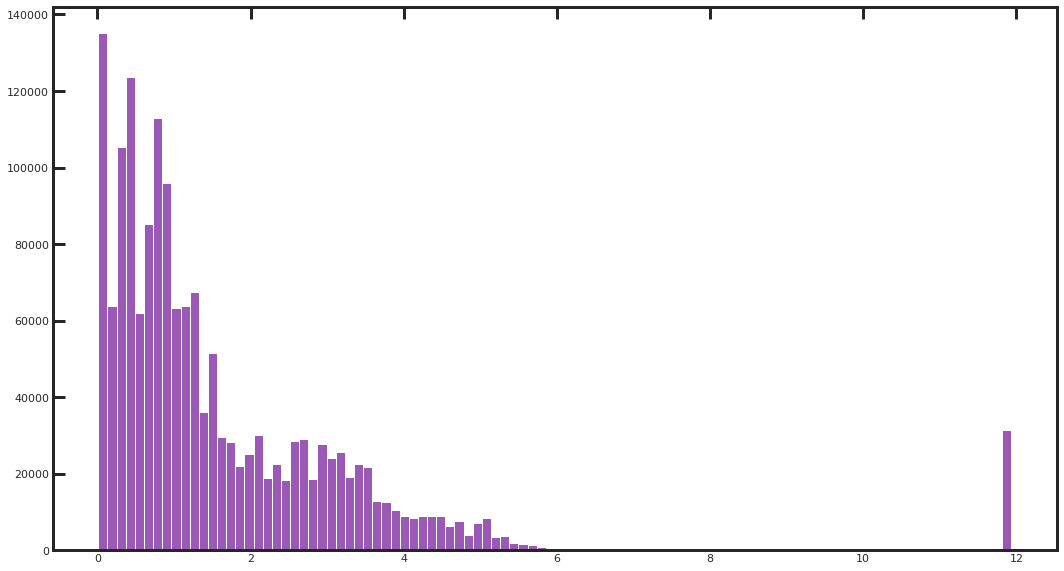

In [25]:
plt.hist(df["ez_z_phot"].values,bins=100);